[View in Colaboratory](https://colab.research.google.com/github/orico/UnitTestAndDecoratorLogger/blob/master/Q2_Final.ipynb)

1. The task is to write a system that predicts the next day price.
2. Below 10 products and their historical prices. 
3. Please also add automatic test for this problem using this data set and the results. 
4. The results - the next day price of each product is also given to use in tests. 
5. We do not expect to get to this precise number, but to be close enough....



In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unittest
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
# Decorators
from functools import wraps


def my_logger(orig_func):
    import logging
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            '\nRan with args: {}, and kwargs: {}\n'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper


def my_timer(orig_func):
    import time

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('\n{} ran in: {} sec\n'.format(orig_func.__name__, t2))
        return result

    return wrapper

In [0]:
dates = ['1901-01-01','1901-01-02','1901-01-03','1901-01-04','1901-01-05','1901-01-06','1901-01-07','1901-01-08','1901-01-09','1901-01-10',
         '1901-01-11','1901-01-12','1901-01-13','1901-01-14','1901-01-15','1901-01-16','1901-01-17','1901-01-18','1901-01-19','1901-01-20',
         '1901-01-21','1901-01-22','1901-01-23','1901-01-24','1901-01-25','1901-01-26','1901-01-27','1901-01-28','1901-01-29','1901-01-30']

@my_logger
@my_timer
def productResults():
  print('\nproductResults ran\n')
  p1 = [12181,18456,15368,8953,10306,18352,16162,16627,15632,13525,8882,9285,17315,17054,17035,16373,14914,9415,10408,17892,17721,18665,16316,14331,8710,9353,17621,19662,18503,17738]
  p2 = [15988,23646,23029,23255,21660,22639,20418,17606,31214,32611,29834,27416,23380,23550,20950,25477,22376,17316,16298,24809,30444,22871,31241,26043,13331,19041,24609,24226,21177,26686]
  p3 = [31977,26428,30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316]
  p4 = [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545]
  p5 = [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649,22272,21714,20599,22644]
  p6 = [14586,15045,14418,15487,8442,6102,7346,6435,10563,9260,7427,8763,32612,43362,33552,34764,22582,25999,32613,28931,30697,28922,21549,33951,41149,31534,32633,31538,27217,28363]
  p7 = [24159,21502,23526,28600,28255,28431,30295,29082,22989,24346,28906,27842,26519,27036,25793,22421,24309,26845,25246,28104,29814,28303,24059,27514,32436,30657,31052,32093,28165,22874]
  p8 = [268761,226644,202903,201372,191240,198024,267412,289817,233144,210205,178994,155626,248158,252471,291896,301777,217711,200980,185491,183430,215310,227871,182765,168251,154917,143351,133672,165432,184370,158707]
  p9 = [305612,302201,279930,260691,217624,160977,215527,284858,266054,257197,243647,200695,147070,196671,252610,245556,249167,235139,207565,146888,176367,232367,212906,190481,173051,149319,110361,138222,193611,180049]
  p10 = [176704,237519,219852,211973,202701,175408,139700,191837,243161,237931,219984,194502,165109,133597,194239,220393,209988,201083,190071,155357,130214,185792,221262,210200,199335,186937,155093,133439,186395,215085]

  products = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]

  results = [13019,26266,40993,3005058,22685,33372,25496,145638,166472,201760]

  return products, results


@my_logger
@my_timer
def statistics(products):
  print('\nstatistics ran with arguments ({})\n'.format(products))
  stats = []
  for i in range(len(products)):
    stat = len(products[i]), np.sum(products[i]), np.mean(products[i]), np.std(products[i])
    stats.append(stat)
    print('\n',stat)
  return stats


@my_logger
@my_timer
def plotHistograms(products):
  print('\nplotHistograms ran with arguments ({})\n'.format(products))
  for i in range(len(products)):
    plt.hist(products[i])
    plt.show()
    plt.plot(products[i])
    plt.show()

@my_logger
@my_timer
def calc(finalResults, results, stats):
  print('\ncalc ran with arguments ({}, {}, {})\n'.format(finalResults, results, stats))
  smallerThanSTDs = []
  for i in range(len(finalResults)):
    absdiff = int(np.abs(finalResults[i] - results[i]))
    stdev = stats[i][3]
    smallerThanSTD = absdiff <= stdev
    print(i,'is Y^-Y smaller than STD?',smallerThanSTD,'absdiff:', absdiff,'stdev:', stdev)
    smallerThanSTDs.append(smallerThanSTD)
  return smallerThanSTDs


In [0]:
class TheModel(object):
  
    verbose = 1
    
    @my_logger
    @my_timer
    def __init__(self, verbose):
      self.verbose = verbose
          
    @my_logger
    @my_timer
    def fit(self, AR, X):
      print('\nfit ran with arguments ({}, {})\n'.format(AR, X))
      series =  pd.DataFrame(X, columns=['p1'])
      series.index = dates
      series.index = pd.to_datetime(series.index)
      series['p1'] = pd.to_numeric(series['p1'], downcast='float') 
      if self.verbose == 1:
        series.plot()
        plt.show()

        autocorrelation_plot(series)
        plt.show()

      X = series.values 
      size = 20
      train,  val = X[:size], X[size:]
      history = [x for x in train]
      predictions = list()  

      for t in range(len(val)):
        model = ARIMA(history, order=(AR,1,0))
        self.model_fit = model.fit(disp=0)
        output = self.model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = val[t]       
        history.append(obs)
        if self.verbose == 1:
          print('predicted=%f, expected=%f' % (yhat, obs)) 

      if self.verbose == 1:
        print(self.model_fit.summary())

      # plot residual errors
      residuals = pd.DataFrame(self.model_fit.resid)
      if self.verbose == 1:
        residuals.plot()
        plt.show()
        residuals.plot(kind='kde')
        plt.show()
        print(residuals.describe())

      if self.verbose == 1:
    #    error = mean_squared_error(val, predictions)
    #    print('Test MSE: %.3f' % error)
        # plot
        plt.plot(val)
        plt.plot(predictions, color='red')
        plt.show()
      print('\n====================================================================================================\n')
    #   finalResults = ((int(output[0]), int(results)))
    
      return self.model_fit

    @my_logger
    @my_timer
    def predict(self): 
      print('\npredict ran')
      output = self.model_fit.forecast()
      if self.verbose == 1:  
        print('predicted future value=%f' % (output[0]))
        print('')
      return int(output[0])   

.

setupClass
setUp

calc ran with arguments ([16070, 22088, 39892, 3315694, 19308, 28066, 27455, 179422, 191908, 214162], [13019, 26266, 40993, 3005058, 22685, 33372, 25496, 145638, 166472, 201760], [(30, 442755, 14758.5, 3577.1019345274467), (30, 703141, 23438.033333333333, 4697.761938649321), (30, 1034329, 34477.63333333333, 4484.658191979505), (30, 96879394, 3229313.1333333333, 215886.3940566478), (30, 1207407, 40246.9, 21041.77892249924), (30, 685842, 22861.4, 11244.981217117853), (30, 811173, 27039.1, 2918.7904726672887), (30, 6240702, 208023.4, 44571.75808782956), (30, 6432413, 214413.76666666666, 50295.37056806411), (30, 5744861, 191495.36666666667, 31246.922644727038)])

0 is Y^-Y smaller than STD? True absdiff: 3051 stdev: 3577.1019345274467
1 is Y^-Y smaller than STD? True absdiff: 4178 stdev: 4697.761938649321
2 is Y^-Y smaller than STD? True absdiff: 1101 stdev: 4484.658191979505
3 is Y^-Y smaller than STD? False absdiff: 310636 stdev: 215886.3940566478
4 is Y^-Y smaller than

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):





fit ran in: 1.5204060077667236 sec


predict ran

predict ran in: 0.0006849765777587891 sec


__init__ ran in: 1.430511474609375e-06 sec


fit ran with arguments (2, [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686])




fit ran in: 1.1864862442016602 sec


predict ran

predict ran in: 0.0009632110595703125 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316])




fit ran in: 2.1566689014434814 sec


predict ran

predict ran in: 0.0011124610900878906 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)





fit ran in: 2.2195205688476562 sec


predict ran

predict ran in: 0.0010864734649658203 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649, 22272, 21714, 20599, 22644])




fit ran in: 2.1596360206604004 sec


predict ran

predict ran in: 0.0010364055633544922 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [14586, 15045, 14418, 15487, 8442, 6102, 7346, 6435, 10563, 9260, 7427, 8763, 32612, 43362, 33552, 34764, 22582, 25999, 32613, 28931, 30697, 28922, 21549, 33951, 41149, 31534, 32633, 31538, 27217, 28363])




fit ran in: 1.8172647953033447 sec


predict ran

predict ran in: 0.0012235641479492188 sec


__init__ ran in: 1.6689300537109375e-06 sec


fit ran with arguments (3, [24159, 21502, 23526, 28600, 28255, 28431, 30295, 29082, 22989, 24346, 28906

...




fit ran in: 2.381520986557007 sec


predict ran

predict ran in: 0.0010879039764404297 sec

tearDown

setUp

productResults ran


productResults ran in: 9.465217590332031e-05 sec

tearDown

setUp

statistics ran with arguments ([[12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738], [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686], [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316], [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 30


----------------------------------------------------------------------
Ran 4 tests in 20.268s

OK


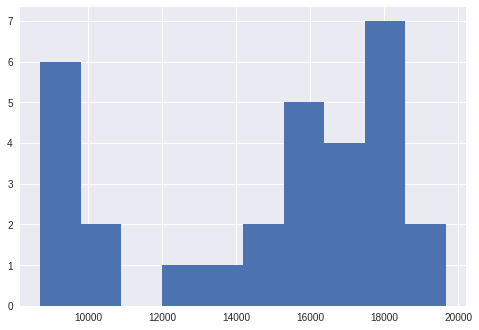

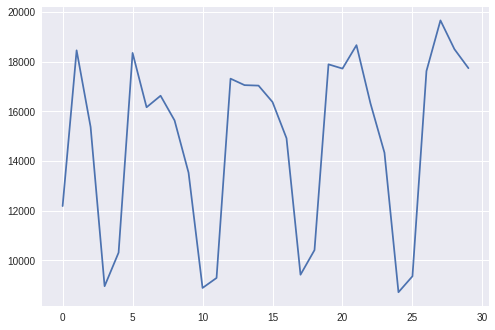

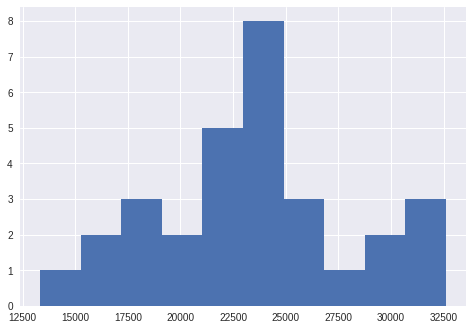

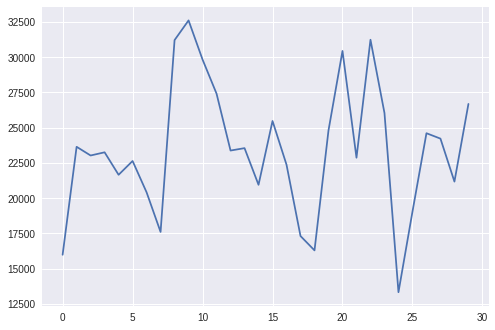

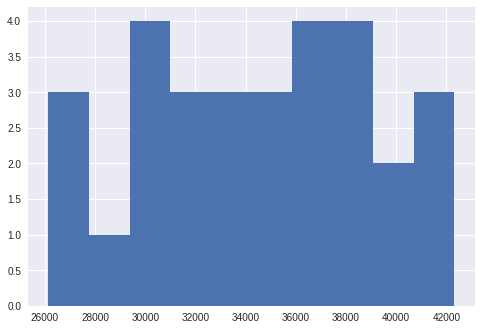

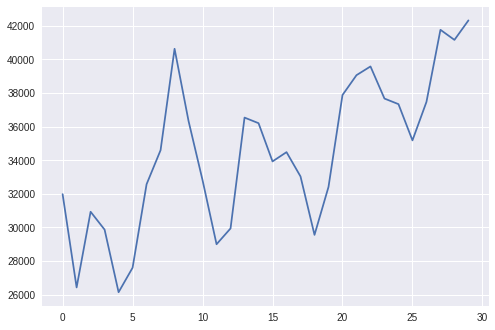

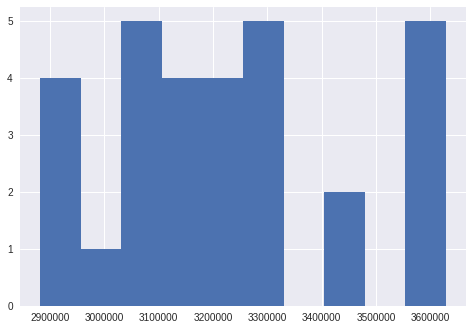

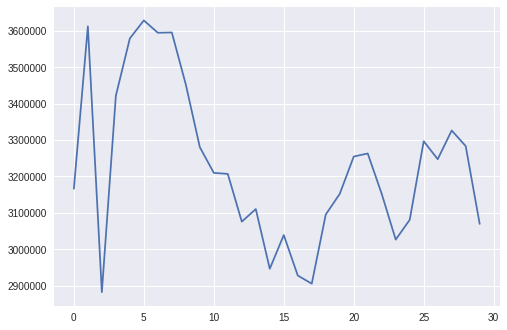

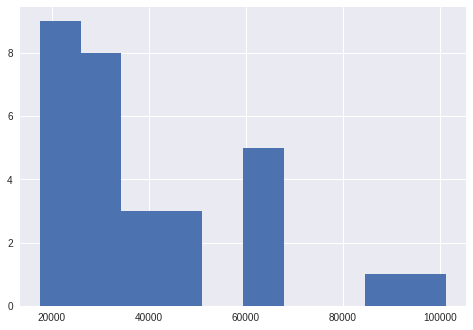

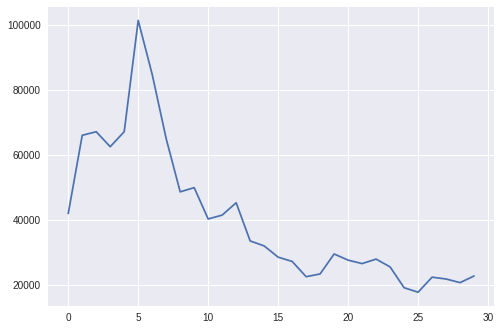

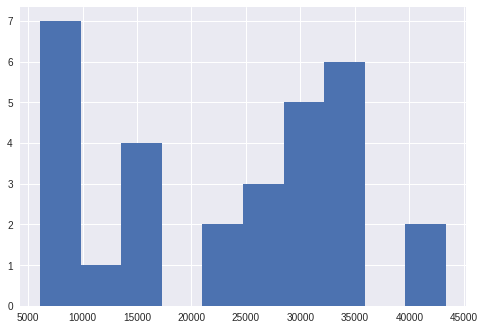

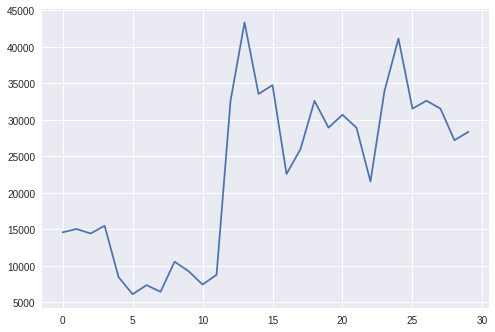

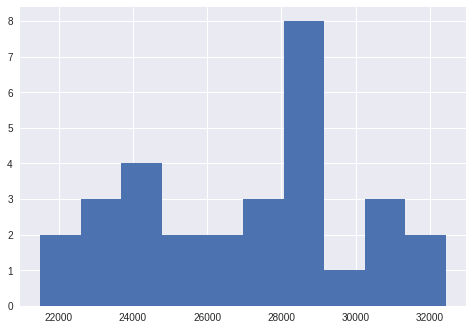

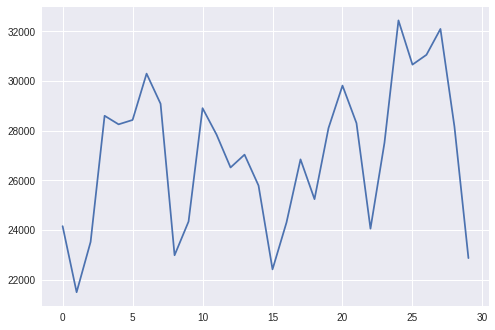

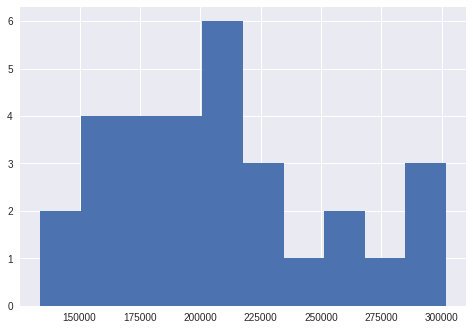

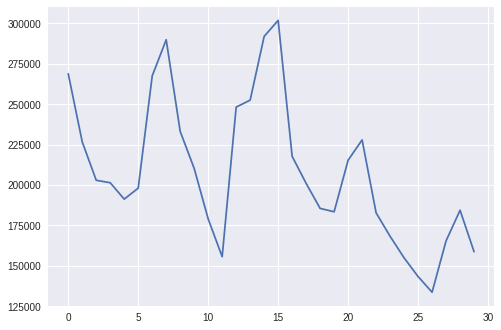

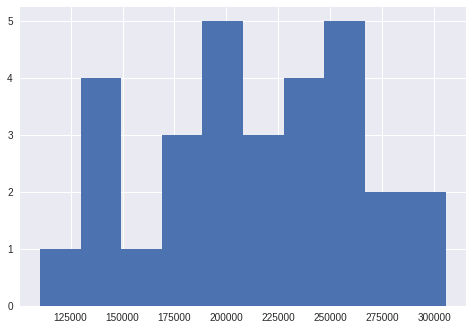

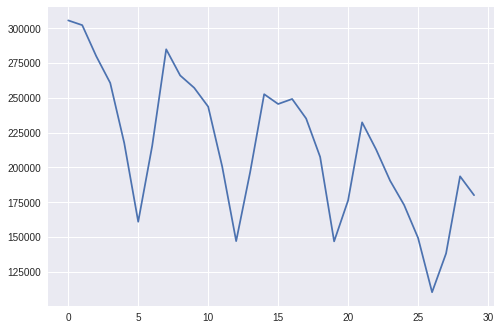

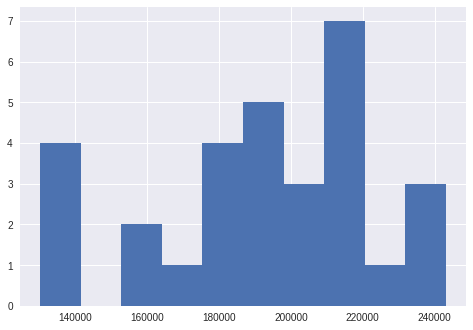

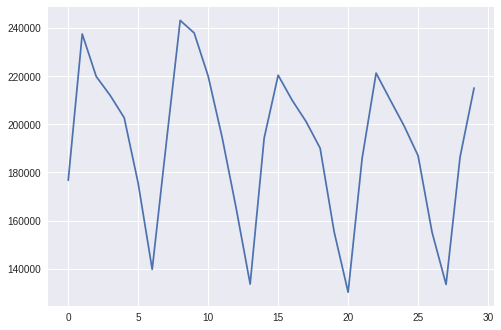


plotHistograms ran in: 4.4357757568359375 sec


__init__ ran in: 2.1457672119140625e-06 sec


fit ran with arguments (3, [12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738])



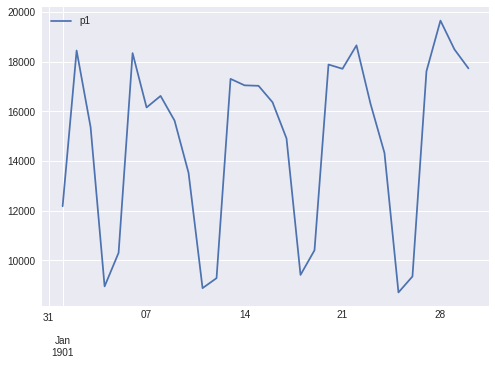

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


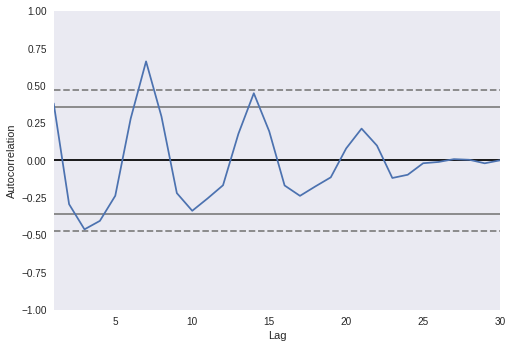

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=18380.472367, expected=17721.000000
predicted=13198.588441, expected=18665.000000
predicted=17969.321968, expected=16316.000000
predicted=16365.439782, expected=14331.000000
predicted=15615.510583, expected=8710.000000
predicted=9921.617728, expected=9353.000000
predicted=12129.122025, expected=17621.000000
predicted=18838.447523, expected=19662.000000
predicted=15554.935922, expected=18503.000000
predicted=16070.237029, expected=17738.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -268.132
Method:                       css-mle   S.D. of innovations           3444.786
Date:                Mon, 30 Apr 2018   AIC                            546.265
Time:                        15:36:04   BIC                            552.926
Sample:                             1   HQIC                         

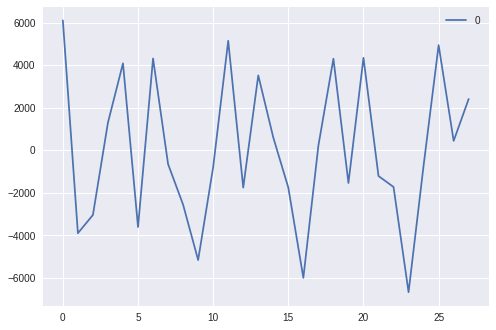

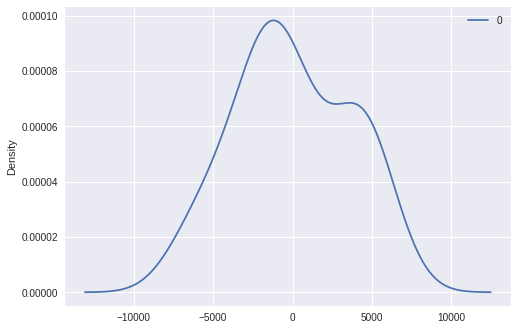

                 0
count    28.000000
mean     15.344129
std    3587.691366
min   -6684.546869
25%   -1967.241253
50%    -692.494138
75%    3656.194092
max    6100.142073


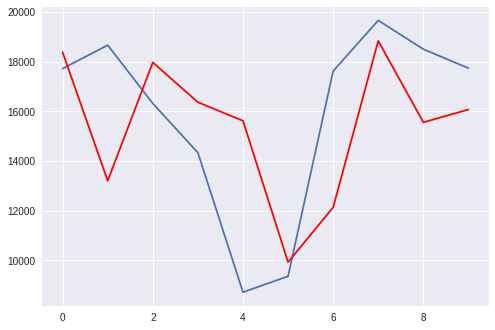




fit ran in: 3.1691818237304688 sec


predict ran
predicted future value=16070.237029


predict ran in: 0.0025289058685302734 sec


__init__ ran in: 2.384185791015625e-06 sec


fit ran with arguments (2, [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686])



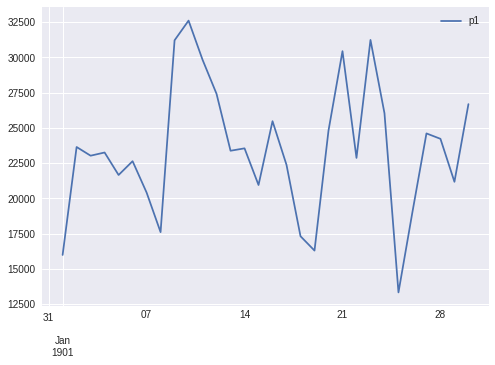

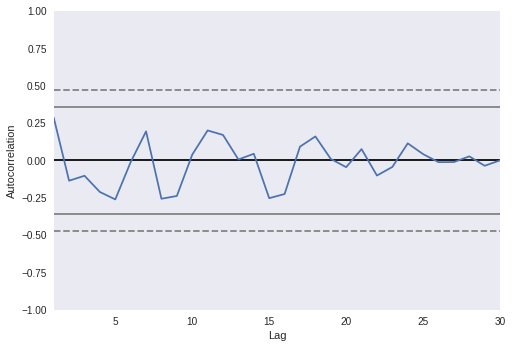

predicted=24798.708643, expected=30444.000000
predicted=28724.546972, expected=22871.000000
predicted=21094.760492, expected=31241.000000
predicted=32840.058195, expected=26043.000000
predicted=26178.196450, expected=13331.000000
predicted=17573.291590, expected=19041.000000
predicted=22784.684638, expected=24609.000000
predicted=21321.892843, expected=24226.000000
predicted=22408.166718, expected=21177.000000
predicted=22088.266051, expected=26686.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -278.320
Method:                       css-mle   S.D. of innovations           4987.630
Date:                Mon, 30 Apr 2018   AIC                            564.641
Time:                        15:36:07   BIC                            569.969
Sample:                             1   HQIC                      

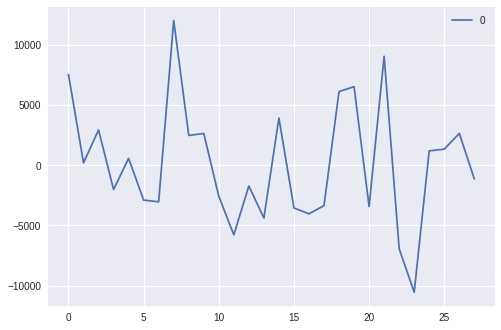

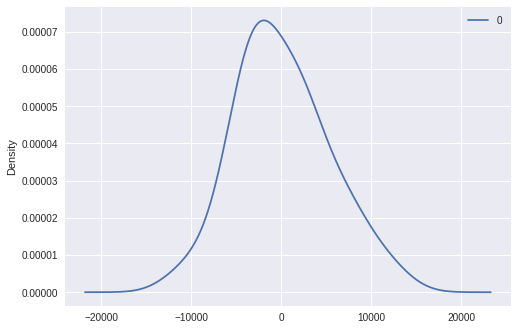

                  0
count     28.000000
mean     128.949349
std     5112.347569
min   -10542.656938
25%    -3377.856453
50%     -471.819287
75%     2707.628780
max    12012.018003


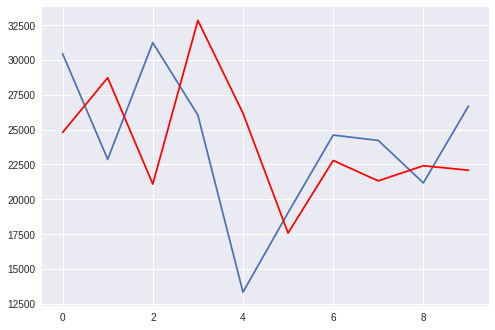




fit ran in: 2.540346384048462 sec


predict ran
predicted future value=22088.266051


predict ran in: 0.0018944740295410156 sec


__init__ ran in: 2.384185791015625e-06 sec


fit ran with arguments (3, [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316])



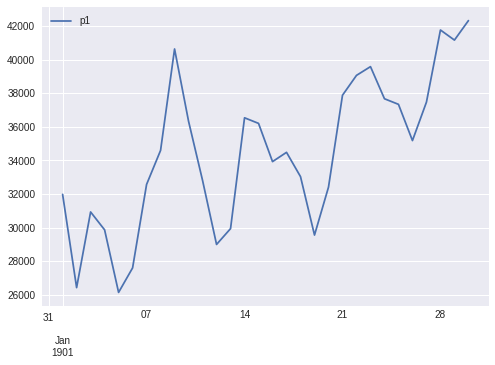

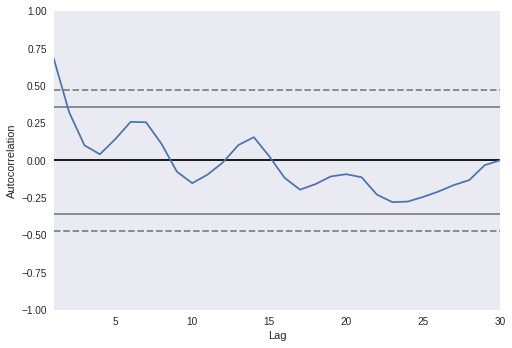

predicted=33521.409475, expected=37876.000000
predicted=37953.327974, expected=39057.000000
predicted=37215.080491, expected=39577.000000
predicted=38789.488768, expected=37666.000000
predicted=37679.587962, expected=37334.000000
predicted=38144.151119, expected=35178.000000
predicted=35863.591636, expected=37467.000000
predicted=38429.817944, expected=41757.000000
predicted=42233.898267, expected=41157.000000
predicted=39892.608659, expected=42316.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -265.010
Method:                       css-mle   S.D. of innovations           3101.875
Date:                Mon, 30 Apr 2018   AIC                            540.020
Time:                        15:36:10   BIC                            546.681
Sample:                             1   HQIC                      

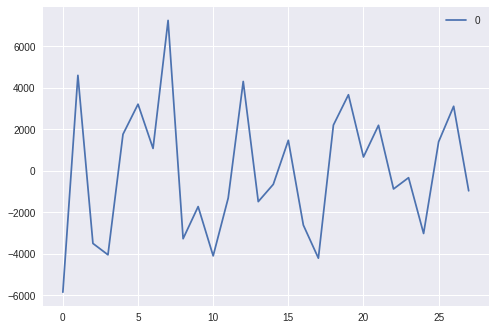

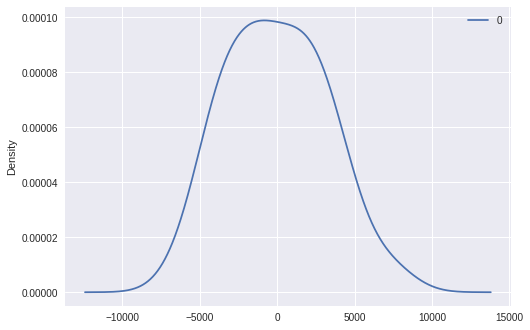

                 0
count    28.000000
mean    -38.885203
std    3204.933617
min   -5852.469506
25%   -2718.873252
50%    -492.957324
75%    2193.941372
max    7247.059855


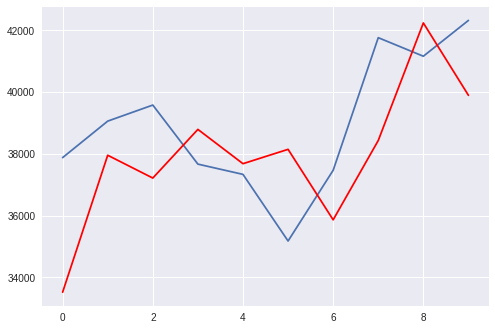




fit ran in: 3.4316599369049072 sec


predict ran
predicted future value=39892.608659


predict ran in: 0.0016717910766601562 sec


__init__ ran in: 2.1457672119140625e-06 sec


fit ran with arguments (6, [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545])



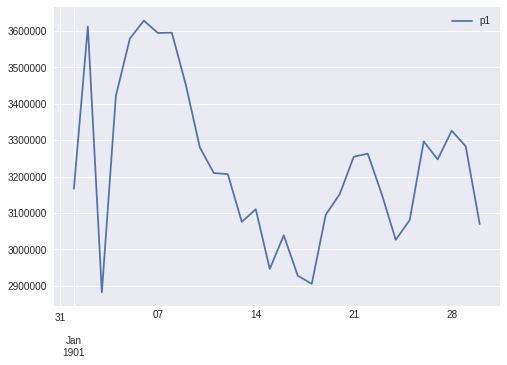

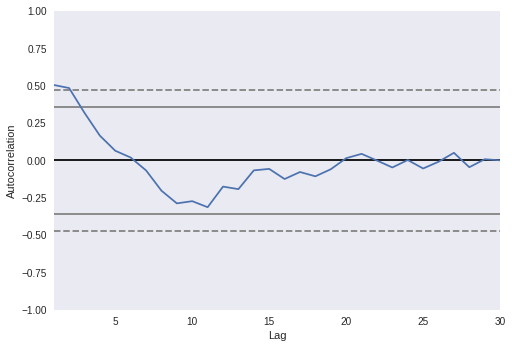

predicted=3056417.612540, expected=3254533.000000
predicted=3180492.796348, expected=3262962.000000
predicted=3249331.038429, expected=3151966.000000
predicted=3060558.190048, expected=3026427.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2910157.402329, expected=3080692.000000
predicted=2904945.767212, expected=3296611.000000
predicted=3145279.202310, expected=3247278.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3314801.312342, expected=3326148.000000
predicted=3286590.341135, expected=3283342.000000
predicted=3244339.433874, expected=3069545.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -378.929
Method:                       css-mle   S.D. of innovations         179637.500
Date:                Mon, 30 Apr 2018   AIC                            773.857
Time:                        15:36:19   BIC                            784.515
Sample:                             1   HQIC                           777.115
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7920.3424   1.62e+04     -0.489      0.630   -3.

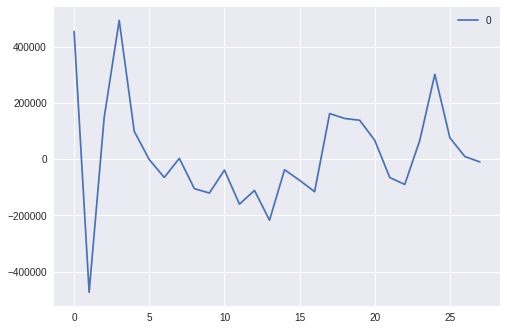

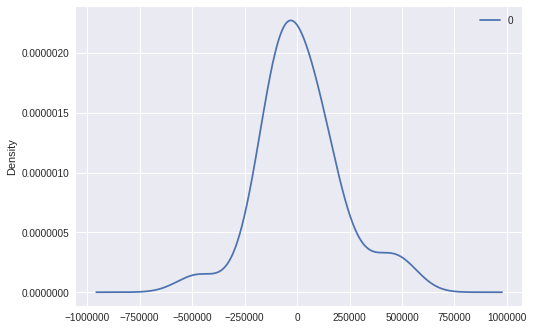

                   0
count      28.000000
mean    16895.409824
std    194301.846106
min   -473504.156533
25%    -93885.705658
50%     -5976.657968
75%    108743.605723
max    493447.435838


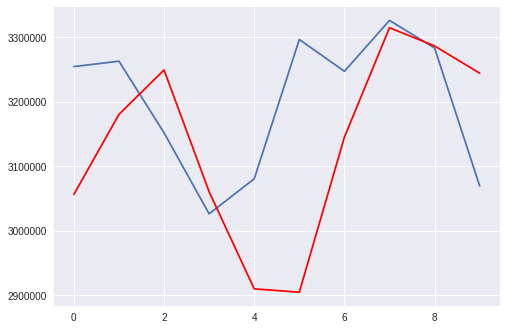




fit ran in: 9.294105052947998 sec


predict ran
predicted future value=3244339.433874


predict ran in: 0.001959085464477539 sec


__init__ ran in: 2.1457672119140625e-06 sec


fit ran with arguments (3, [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649, 22272, 21714, 20599, 22644])



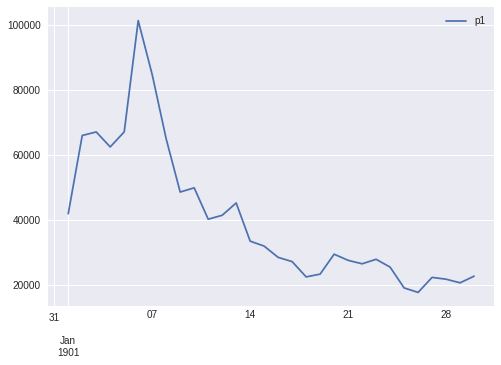

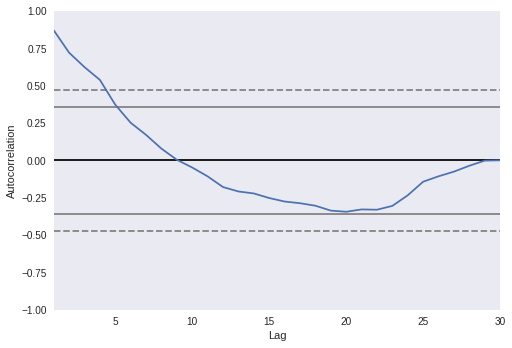

predicted=28504.474798, expected=27520.000000
predicted=24479.188986, expected=26455.000000
predicted=25386.167074, expected=27840.000000
predicted=27172.986099, expected=25434.000000
predicted=23815.340799, expected=19032.000000
predicted=17838.568079, expected=17649.000000
predicted=17967.414340, expected=22272.000000
predicted=21937.402857, expected=21714.000000
predicted=19226.899075, expected=20599.000000
predicted=19308.768731, expected=22644.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -298.147
Method:                       css-mle   S.D. of innovations          10160.962
Date:                Mon, 30 Apr 2018   AIC                            606.295
Time:                        15:36:23   BIC                            612.956
Sample:                             1   HQIC                      

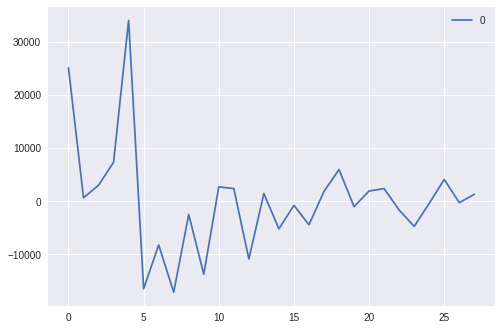

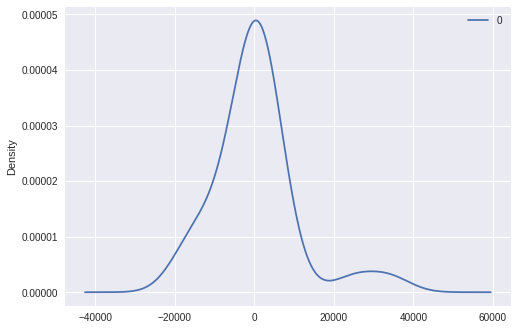

                  0
count     28.000000
mean     240.486227
std    10431.855230
min   -17087.463582
25%    -4499.538099
50%      190.334218
75%     2453.533135
max    33961.319780


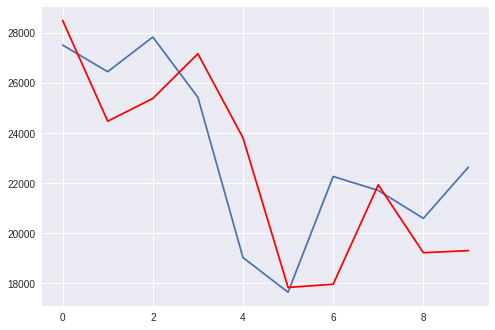




fit ran in: 3.3827767372131348 sec


predict ran
predicted future value=19308.768731


predict ran in: 0.010925054550170898 sec


__init__ ran in: 2.384185791015625e-06 sec


fit ran with arguments (3, [14586, 15045, 14418, 15487, 8442, 6102, 7346, 6435, 10563, 9260, 7427, 8763, 32612, 43362, 33552, 34764, 22582, 25999, 32613, 28931, 30697, 28922, 21549, 33951, 41149, 31534, 32633, 31538, 27217, 28363])



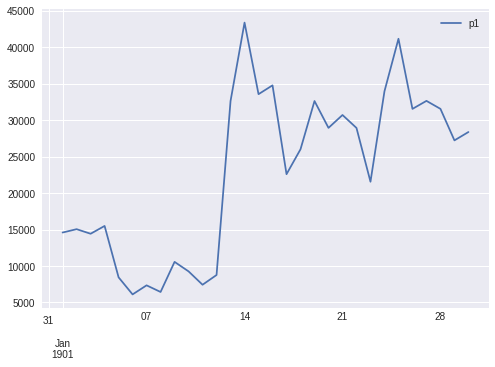

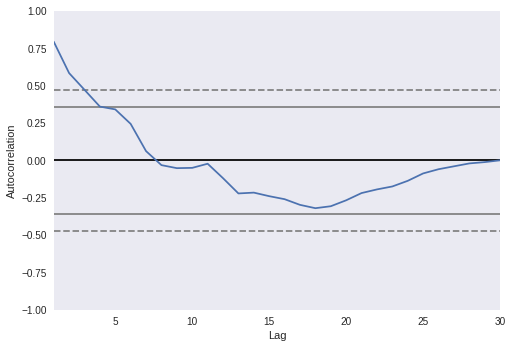

predicted=27789.072236, expected=30697.000000
predicted=31991.396226, expected=28922.000000
predicted=29762.095394, expected=21549.000000
predicted=21540.589597, expected=33951.000000
predicted=36889.058611, expected=41149.000000
predicted=40327.271713, expected=31534.000000
predicted=29630.860451, expected=32633.000000
predicted=36509.721339, expected=31538.000000
predicted=32404.462614, expected=27217.000000
predicted=28066.332380, expected=28363.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -287.358
Method:                       css-mle   S.D. of innovations           6913.154
Date:                Mon, 30 Apr 2018   AIC                            584.717
Time:                        15:36:26   BIC                            591.378
Sample:                             1   HQIC                      

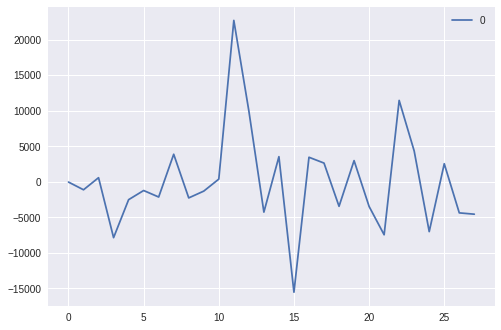

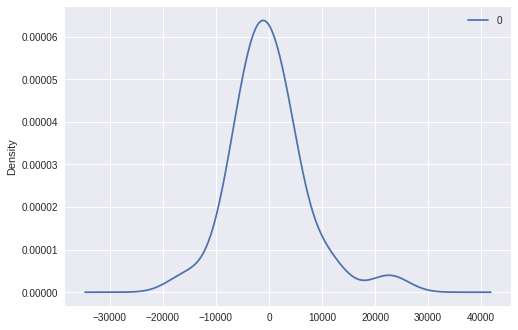

                  0
count     28.000000
mean     -26.551375
std     7040.208636
min   -15560.042107
25%    -3689.527670
50%    -1196.189599
75%     3077.921903
max    22692.929165


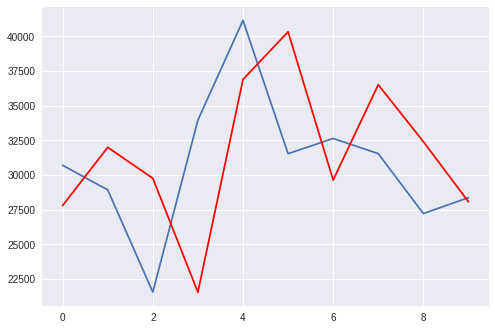




fit ran in: 3.0368754863739014 sec


predict ran
predicted future value=28066.332380


predict ran in: 0.0018966197967529297 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [24159, 21502, 23526, 28600, 28255, 28431, 30295, 29082, 22989, 24346, 28906, 27842, 26519, 27036, 25793, 22421, 24309, 26845, 25246, 28104, 29814, 28303, 24059, 27514, 32436, 30657, 31052, 32093, 28165, 22874])



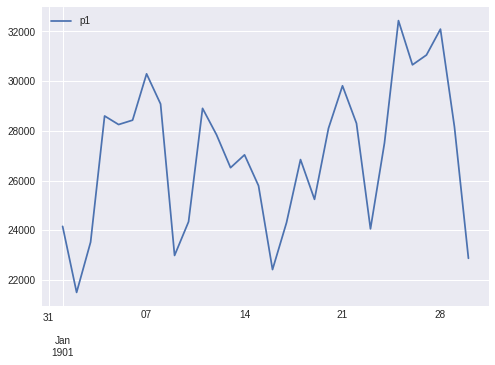

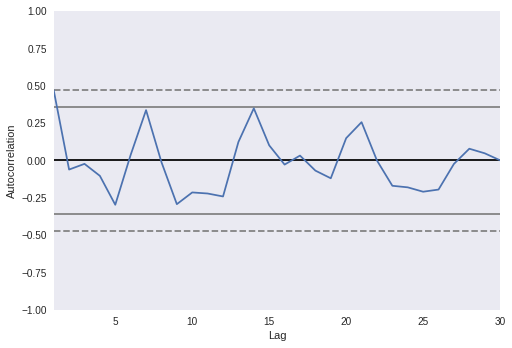

predicted=30984.322606, expected=29814.000000
predicted=28282.556623, expected=28303.000000
predicted=28472.756522, expected=24059.000000
predicted=24742.899063, expected=27514.000000
predicted=30287.762790, expected=32436.000000
predicted=30155.596981, expected=30657.000000
predicted=28376.241510, expected=31052.000000
predicted=34045.446853, expected=32093.000000
predicted=31964.460738, expected=28165.000000
predicted=27455.846327, expected=22874.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -255.414
Method:                       css-mle   S.D. of innovations           2173.694
Date:                Mon, 30 Apr 2018   AIC                            520.828
Time:                        15:36:29   BIC                            527.489
Sample:                             1   HQIC                      

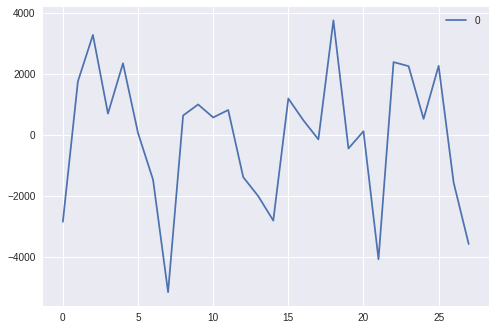

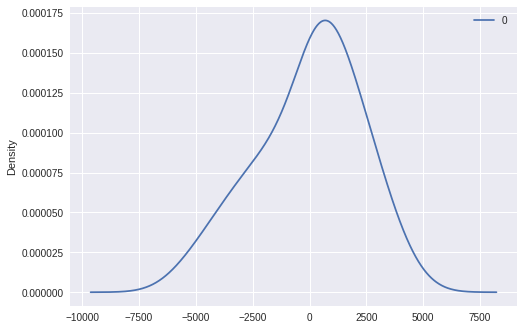

                 0
count    28.000000
mean    -51.144294
std    2255.360754
min   -5168.306595
25%   -1497.647220
50%     500.934940
75%    1332.052869
max    3756.957780


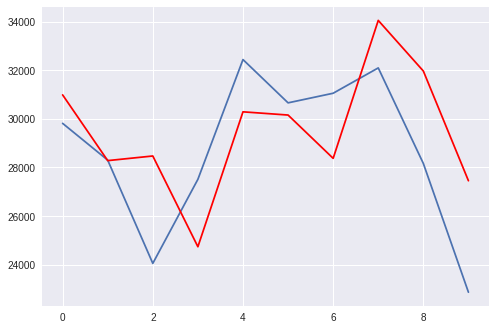




fit ran in: 3.268414258956909 sec


predict ran
predicted future value=27455.846327


predict ran in: 0.0018460750579833984 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [268761, 226644, 202903, 201372, 191240, 198024, 267412, 289817, 233144, 210205, 178994, 155626, 248158, 252471, 291896, 301777, 217711, 200980, 185491, 183430, 215310, 227871, 182765, 168251, 154917, 143351, 133672, 165432, 184370, 158707])



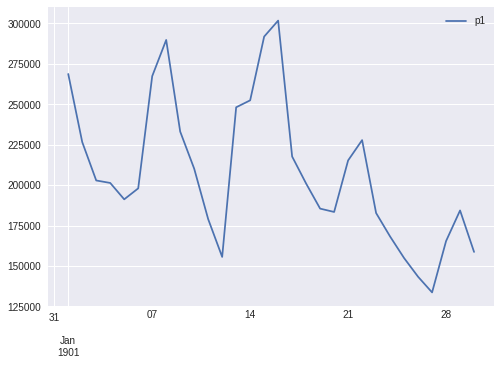

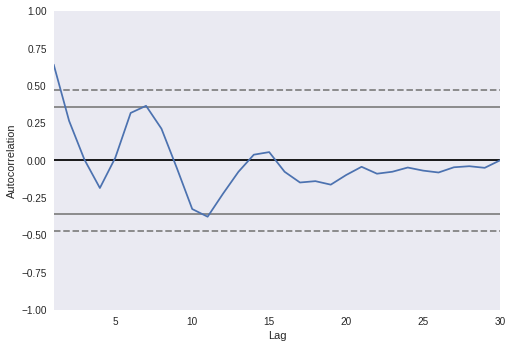

predicted=182534.442564, expected=215310.000000
predicted=218928.256979, expected=227871.000000
predicted=223324.030984, expected=182765.000000
predicted=166826.588994, expected=168251.000000
predicted=168546.229867, expected=154917.000000
predicted=156915.093553, expected=143351.000000
predicted=140506.178894, expected=133672.000000
predicted=130547.559723, expected=165432.000000
predicted=168484.838381, expected=184370.000000
predicted=179422.472023, expected=158707.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -332.289
Method:                       css-mle   S.D. of innovations          34406.280
Date:                Mon, 30 Apr 2018   AIC                            674.578
Time:                        15:36:33   BIC                            681.239
Sample:                             1   HQIC  

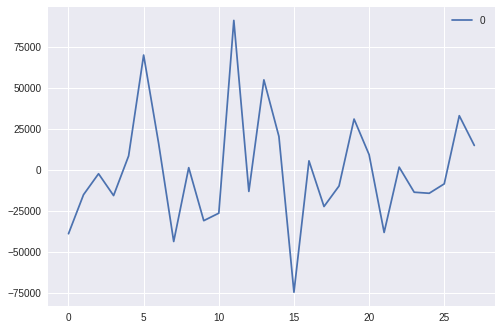

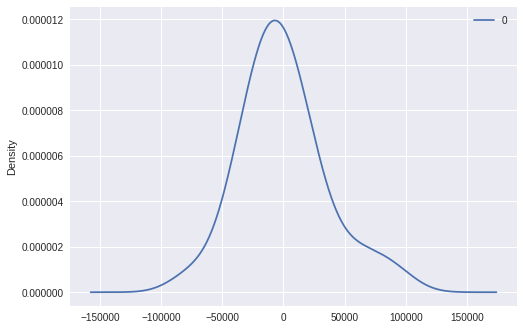

                  0
count     28.000000
mean    -409.740564
std    35097.965063
min   -74754.951915
25%   -17417.025512
50%    -5501.927278
75%    15130.259056
max    91217.091280


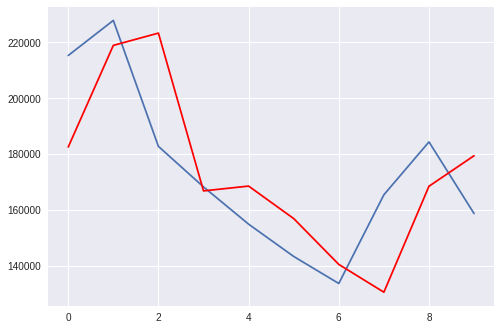




fit ran in: 3.5715537071228027 sec


predict ran
predicted future value=179422.472023


predict ran in: 0.0012276172637939453 sec


__init__ ran in: 2.384185791015625e-06 sec


fit ran with arguments (3, [305612, 302201, 279930, 260691, 217624, 160977, 215527, 284858, 266054, 257197, 243647, 200695, 147070, 196671, 252610, 245556, 249167, 235139, 207565, 146888, 176367, 232367, 212906, 190481, 173051, 149319, 110361, 138222, 193611, 180049])



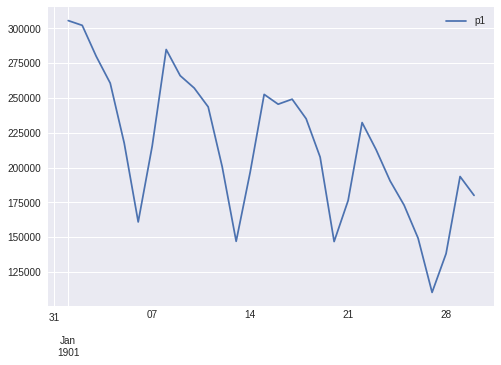

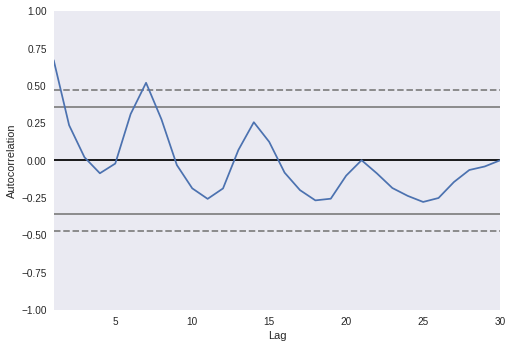

predicted=125876.125813, expected=176367.000000
predicted=206285.029463, expected=232367.000000
predicted=231054.798305, expected=212906.000000
predicted=172561.006601, expected=190481.000000
predicted=190855.030241, expected=173051.000000
predicted=172595.208371, expected=149319.000000
predicted=143679.293714, expected=110361.000000
predicted=99674.014746, expected=138222.000000
predicted=158272.096486, expected=193611.000000
predicted=191908.980822, expected=180049.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -330.066
Method:                       css-mle   S.D. of innovations          31492.091
Date:                Mon, 30 Apr 2018   AIC                            670.131
Time:                        15:36:36   BIC                            676.792
Sample:                             1   HQIC   

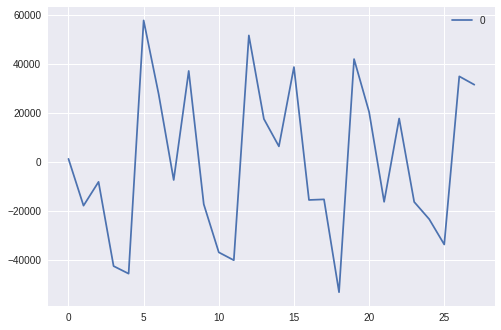

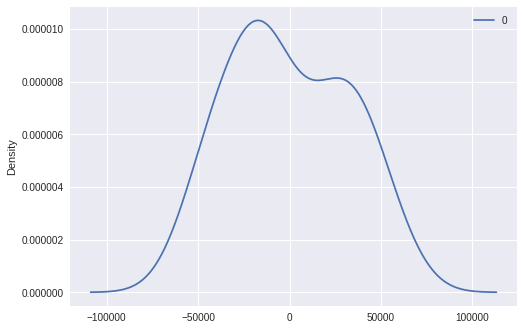

                  0
count     28.000000
mean    -284.186886
std    32117.289146
min   -53325.071288
25%   -19354.050455
50%    -7871.822068
75%    28522.492091
max    57688.109924


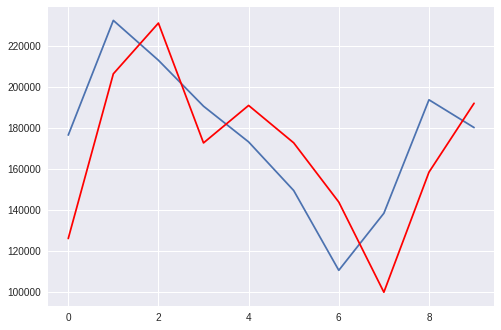




fit ran in: 3.5041167736053467 sec


predict ran
predicted future value=191908.980822


predict ran in: 0.0011887550354003906 sec


__init__ ran in: 1.6689300537109375e-06 sec


fit ran with arguments (3, [176704, 237519, 219852, 211973, 202701, 175408, 139700, 191837, 243161, 237931, 219984, 194502, 165109, 133597, 194239, 220393, 209988, 201083, 190071, 155357, 130214, 185792, 221262, 210200, 199335, 186937, 155093, 133439, 186395, 215085])



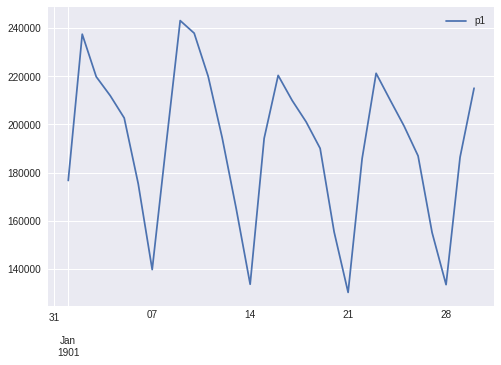

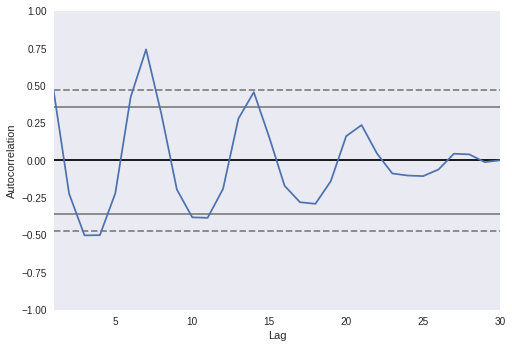

predicted=152186.252573, expected=130214.000000
predicted=135507.122445, expected=185792.000000
predicted=213636.584134, expected=221262.000000
predicted=209629.834167, expected=210200.000000
predicted=184295.159638, expected=199335.000000
predicted=198459.093044, expected=186937.000000
predicted=190780.300280, expected=155093.000000
predicted=152231.601794, expected=133439.000000
predicted=140077.646750, expected=186395.000000
predicted=214162.099655, expected=215085.000000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -327.151
Method:                       css-mle   S.D. of innovations          28384.365
Date:                Mon, 30 Apr 2018   AIC                            664.302
Time:                        15:36:40   BIC                            670.963
Sample:                             1   HQIC  

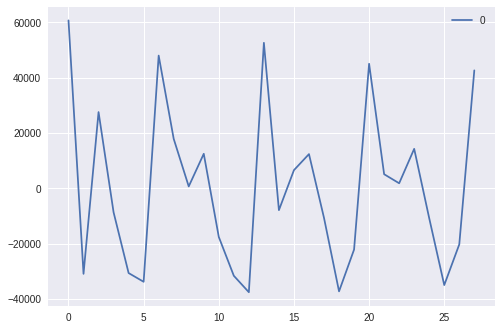

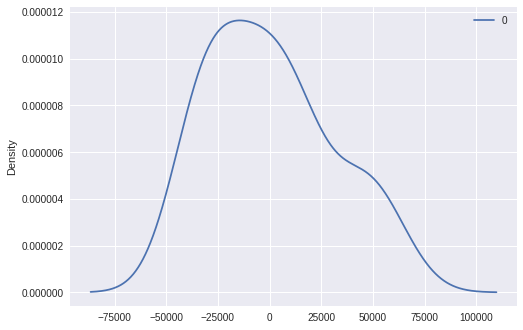

                  0
count     28.000000
mean     459.233389
std    29724.955121
min   -37527.841390
25%   -24247.524195
50%    -3602.910433
75%    15162.019581
max    60648.665082


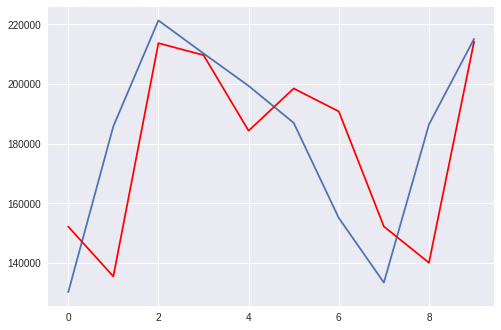




fit ran in: 3.5814151763916016 sec


predict ran
predicted future value=214162.099655


predict ran in: 0.0020494461059570312 sec


calc ran with arguments ([16070, 22088, 39892, 3244339, 19308, 28066, 27455, 179422, 191908, 214162], [13019, 26266, 40993, 3005058, 22685, 33372, 25496, 145638, 166472, 201760], [(30, 442755, 14758.5, 3577.1019345274467), (30, 703141, 23438.033333333333, 4697.761938649321), (30, 1034329, 34477.63333333333, 4484.658191979505), (30, 96879394, 3229313.1333333333, 215886.3940566478), (30, 1207407, 40246.9, 21041.77892249924), (30, 685842, 22861.4, 11244.981217117853), (30, 811173, 27039.1, 2918.7904726672887), (30, 6240702, 208023.4, 44571.75808782956), (30, 6432413, 214413.76666666666, 50295.37056806411), (30, 5744861, 191495.36666666667, 31246.922644727038)])

0 is Y^-Y smaller than STD? True absdiff: 3051 stdev: 3577.1019345274467
1 is Y^-Y smaller than STD? True absdiff: 4178 stdev: 4697.761938649321
2 is Y^-Y smaller than STD? True absdiff: 1101 stdev

In [5]:
class TestInput(unittest.TestCase):
  
    @classmethod
    def setUpClass(cls):
        print('setupClass')

    @classmethod
    def tearDownClass(cls):
        print('teardownClass')

    def setUp(self):
        print('setUp')
        self.products = [[12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738],
                    [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686],
                    [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316],
                    [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545],
                    [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649, 22272, 21714, 20599, 22644],
                    [14586, 15045, 14418, 15487, 8442, 6102, 7346, 6435, 10563, 9260, 7427, 8763, 32612, 43362, 33552, 34764, 22582, 25999, 32613, 28931, 30697, 28922, 21549, 33951, 41149, 31534, 32633, 31538, 27217, 28363],
                    [24159, 21502, 23526, 28600, 28255, 28431, 30295, 29082, 22989, 24346, 28906, 27842, 26519, 27036, 25793, 22421, 24309, 26845, 25246, 28104, 29814, 28303, 24059, 27514, 32436, 30657, 31052, 32093, 28165, 22874],
                    [268761, 226644, 202903, 201372, 191240, 198024, 267412, 289817, 233144, 210205, 178994, 155626, 248158, 252471, 291896, 301777, 217711, 200980, 185491, 183430, 215310, 227871, 182765, 168251, 154917, 143351, 133672, 165432, 184370, 158707],
                    [305612, 302201, 279930, 260691, 217624, 160977, 215527, 284858, 266054, 257197, 243647, 200695, 147070, 196671, 252610, 245556, 249167, 235139, 207565, 146888, 176367, 232367, 212906, 190481, 173051, 149319, 110361, 138222, 193611, 180049],
                    [176704, 237519, 219852, 211973, 202701, 175408, 139700, 191837, 243161, 237931, 219984, 194502, 165109, 133597, 194239, 220393, 209988, 201083, 190071, 155357, 130214, 185792, 221262, 210200, 199335, 186937, 155093, 133439, 186395, 215085]
                    ]
        self.results = [13019, 26266, 40993, 3005058, 22685, 33372, 25496, 145638, 166472, 201760]
        self.statistics = [(30, 442755, 14758.5, 3577.1019345274467), (30, 703141, 23438.033333333333, 4697.761938649321), (30, 1034329, 34477.63333333333, 4484.658191979505), (30, 96879394, 3229313.1333333333, 215886.3940566478),
                                (30, 1207407, 40246.9, 21041.77892249924), (30, 685842, 22861.4, 11244.981217117853), (30, 811173, 27039.1, 2918.7904726672887), (30, 6240702, 208023.4, 44571.75808782956),
                                (30, 6432413, 214413.76666666666, 50295.37056806411), (30, 5744861, 191495.36666666667, 31246.922644727038)]
        self.finalResults = [16070, 22088, 39892, 3315694, 19308, 28066, 27455, 179422, 191908, 214162] 
        self.AR = [3,2,3,3,3,3,3,3,3,3]
        self.smallerThanSTDs = [True, True, True, False, True, True, True, True, True, True]

    def tearDown(self):
        print('tearDown\n')
        
    def test_productResults(self):
        self.assertEqual(productResults(), (self.products, self.results)) 

    def test_statistics(self):
        self.assertEqual(statistics(self.products), self.statistics)
    
    def test_fit_predict(self):
        for i in range(len(self.products)):
          arm = TheModel(0)
          arm.fit(self.AR[i], self.products[i])
          self.assertEqual(arm.predict(), self.finalResults[i])    
              
    def test_calc(self):
        self.assertEqual(calc(self.finalResults, self.results, self.statistics), self.smallerThanSTDs)
      
if __name__ == '__main__':
  
    #run tests 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
    #get data.
    products, results = productResults()
    print(products,results)
    
    #print some statistics.
    stats = statistics(products)
    print(stats)
    
    #plot the data.
    plotHistograms(products)
    
    #train and predict
    AR = [3,2,3,6,3,3,3,3,3,3]
    finalPredictions = []
    models = []
    for i in range(len(products)):
      a2 = TheModel(1)
      a2.fit(AR[i], products[i])
      predictedValue = a2.predict()
      finalPredictions.append(predictedValue)
      models.append(a2)
    
    #for each prediction, are we within stdev?
    smallerThanSTDs = calc(finalPredictions, results, stats)
    print (smallerThanSTDs)
    
    